In [3]:
from IPython.display import Image

# how to install

> mac

`brew install pypy3`


> ubuntu

https://www.pypy.org/download.html

`tar xf pypy3.6-v7.3.1-osx64.tar.bz2`
`./pypy3.6-v7.3.1-osx64/bin/pypy3`

In [1]:
# test.py
import time

start_time = time.time()

total = 0
for i in range(1, 10000):
    for j in range(1, 10000):
        total += i + j

print(f"The result is {total}")

end_time = time.time()
print(f"It took {end_time-start_time:.2f} seconds to compute")

The result is 999800010000
It took 15.51 seconds to compute


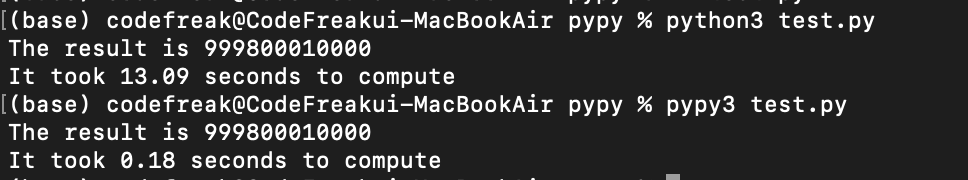

In [4]:
Image('miracle.png')

# cyton 보다 빠르다..!

# features

- dynamic language framework for generating interpreters for dynamic languages (Rpython)
- Python implementation using that framework

# 컴파일러 
- 컴파일러는 고급 언어로 작성된 프로그램 전체를 목적 프로그램으로 번역한 후, 링킹 작업을 통해 컴퓨터에서 실행 가능한 실행 프로그램을 생성합니다.
- 번역 실행 과정을 거쳐야 하기 때문에 번역 과정이 번거롭고 번역 시간이 오래 걸리지만, 한번 번역한 후에는 다시 번역하지 않으므로 실행 속도가 빠릅니다.
- 컴파일러를 사용하는 언어에는 C언어 Java 등이있습니다.

# 인터프리터 
- 인터프리터는 고급 언어로 작성된 프로그램을 한 줄 단위로 받아들여 번역하고, 번역과 동시에 프로그램을 한 줄 단위로 즉시 실행시키는 프로그램입니다.
- 프로그램이 직접 실행되므로 목적 프로그램은 생성되지 않습니다.
- 줄 단위로 번역, 실행되기 떄문에 시분할 시스템에 유용하며 원시 프로그램의 변화에 대한 반응이 빠릅니다.
- 번역 속도는 빠르지만 프로그램 실행 시 매번 번역해야 하므로 실행 속도는 느립니다.
- 인터프리터를 사용하는 언어에는 Python, BASIC, SNOBOL, LISP, APL등이 있습니다.
- CPU의 사용시간의 낭비가 큽니다.

# How PyPy produced

- source code is written in RPython.
- RPython translation toolchain is applied to the code, which basically makes the code more efficient. It also compiles the code down into machine code, which is why Mac, Windows, and Linux users have to download different versions.
- binary executable is produced. This is the Python interpreter that you used to run your small script.
    - binary executable file is a file in a machine language for a specific processor

# Python.. Python.. slow slow
- Python that do a mix of both compilation and interpretation. Specifically, Python is first compiled into an intermediate bytecode,
- which is then interpreted by CPython. This makes the code perform better than code written in a purely interpreted programming language (maintains the portability advantage)
#### But compiled code still much faster 
- compiled code can do a lot of optimizations that just aren’t possible with bytecode
> bytecode는 나중에 다뤄드릴수도?

# just-in-time (JIT) compiler

- tries to get the better doing some real compilation into machine code and some interpretation. 

#### how to Jit provide fast performance?
- Identify the most frequently used components of the code, such as a function in a loop.
- Convert those parts into machine code during runtime.
- Optimize the generated machine code.
- Swap the previous implementation with the optimized machine code version.

# Garbage Collection


- create variables, functions, or any other objects, your computer allocates memory to them.

- objects will no longer be needed. If you don’t clean them up, then your computer may run out of memory and crash your program.
- C and C++, you usually have to deal with this problem manually.
- Python and Java do it for you automatically. This is called automatic garbage collection

#### cpython used GC called reference counting
- Python object’s reference count is incremented whenever the object is referenced, and it’s decremented when the object is dereferenced. 
-  reference count is zero, CPython automatically calls the memory deallocation function for that object. It’s a straightforward and effective technique
### BUT..
- When the reference count of a large tree of objects becomes zero,
- all the related objects are freed. 
- As a result, you have a potentially long pause during which your program doesn’t progress at all.
- Also, there’s a use case in which reference counting simply doesn’t work. Consider the following code:



In [9]:
class A(object):
    pass

a = A()
a.some_property = a
del a

- a instance no longer accessible. 
- However, reference counting doesn’t delete the instance from memory
- because it has a reference to itself, so the reference count is not zero.

#### This problem is called a reference cycle, and it can’t be solved using reference counting.

### CPython uses another tool called the cyclic garbage collector.
- walks over all objects in memory starting from known roots like the type object
- identifies all reachable objects and frees unreachable objects since they aren’t alive anymore. 
- This solves the reference cycle problem.
#### However, it can create even more noticeable pauses when there are a large number of objects in memory.

## PyPy, on the other hand, doesn’t use reference counting. 
- use only the second technique, the cycle finder. 

# Limitations of PyPy


- can be more slow than ctpython.. some case

### It Doesn’t Work Well With C Extensions
-  PyPy can’t optimize C extension modules since they’re not fully supported.
- PyPy has to emulate reference counting for that part of the code, making it even slower.

### It Only Works Well With Long-Running Programs